<a href="https://colab.research.google.com/github/Neha-Anjum263/Adult-Income-Prediction/blob/main/Restaurant_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Libraries Import
Essential libraries for data analysis, visualization, and machine learning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

## Dataset Loading & Initial Exploration
Loading Zomato restaurant data and checking dimensions.

In [2]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Correct path to the CSV file
file_path = "/content/drive/MyDrive/Colab Notebooks/zomato.csv"

# Load dataset
dataset = pd.read_csv(file_path)

# Display shape and first few rows
print(f"Number of Rows: {dataset.shape[0]}, Number of Columns: {dataset.shape[1]}")
dataset.head()


Mounted at /content/drive
Number of Rows: 51717, Number of Columns: 17


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Information
Understanding data types and structure.

In [ ]:
# Display the summary information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Data Preprocessing

### 1. Column Renaming
Simplifying column names for easier access.

In [ ]:
# Rename columns for easier access
dataset.rename(columns = {"approx_cost(for two people)": "costFor2", "listed_in(city)": "city", "listed_in(type)": "type"}, inplace = True)

### 2. Cleaning Columns
Replace the irregular symbols with NaN

In [ ]:
# Replace empty strings in 'menu_item' with NaN
dataset["menu_item"].replace("[]", np.nan, inplace = True)

### 3. Missing Values Analysis
Identifying and quantifying missing data across columns.

In [ ]:
# Check for missing values in the dataset
dp = (dataset.isnull().sum()/dataset.shape[0]) * 100
dp

,0
url,0.000000
address,0.000000
name,0.000000
online_order,0.000000
book_table,0.000000
rate,15.033741
votes,0.000000
phone,2.335789
location,0.040606
rest_type,0.438927


### 4. Dropping Columns
Dropping the columns with Null Values greater than 50%

In [ ]:
# Drop columns with more than 50% missing values
dataset.drop(columns=dp[dp>50].index, inplace=True, axis = 1)
dataset.shape

(51717, 15)

### 5. Feature Engineering
Creating new features from existing data (review count extraction).

In [ ]:
# Fetch the number of reviews for each restaurant out of the 'reviews_list' column
def review_count(l):
    return len(l)

dataset["reviews_count"] = dataset["reviews_list"].apply(review_count)

### 6. Data Cleaning - Rating Column
Converting rating strings to numeric values and handling missing data.

In [ ]:
# Print unique values of 'rate' column
dataset["rate"].unique()

# Clean the 'rate' column
dataset["rate"].replace("NEW", np.nan, inplace=True)
dataset["rate"].replace("-", np.nan, inplace=True)

# Fill NaN values in 'rate' with the mode of the column
dataset.fillna({"rate": dataset["rate"].mode()[0]}, inplace = True)

# Convert 'rate' to numeric values
def clean_rate(x):
    return float(x.split("/")[0])

dataset["rate"] = dataset["rate"].apply(clean_rate)

### 7.Data Cleaning - Cost Column
Processing cost data by removing formatting and converting to numeric.

In [ ]:
# Display unique values of 'costFor2' column
dataset["costFor2"].unique()

# Fill NaN values in 'costFor2' with the mode of the column
dataset.fillna({"costFor2": dataset["costFor2"].mode()[0]}, inplace = True)

# Clean the 'costFor2' column by removing commas and converting to float
def clean_cost(x):
    return float(x.replace(",", ""))

dataset["costFor2"] = dataset["costFor2"].apply(clean_cost)

### 8. Dropping Unnecessary Columns and Rows

In [ ]:
# Drop the unnecessary columns like 'url', 'address', 'phone', 'reviews_list', and 'city'
dataset.drop(["url", "address", "phone", "reviews_list", "city"], axis = 1, inplace = True)

In [ ]:
# Drop rows with NaN values
dataset.dropna(inplace = True)

# Drop duplicate rows
dataset.drop_duplicates(inplace = True)

# Display the shape of the cleaned dataset
dataset.shape

(36774, 11)

In [ ]:
# Display the first few rows of the cleaned dataset
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costFor2,type,reviews_count
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,3955
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,5256
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,7549
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,14876
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,702


In [ ]:
# Final check for missing values
dataset.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
cuisines,0
costFor2,0
type,0


### 9. Categorical Data Processing
Reducing noise by grouping rare categories as 'Other'.

In [ ]:
# Fetch the most frequent values for 'rest_type', 'cuisines', and 'location'
top_rest_type=dataset["rest_type"].value_counts().nlargest(12)
top_cuisines=dataset["cuisines"].value_counts().nlargest(20)
top_location=dataset["location"].value_counts().nlargest(12)

# Replace less frequent values in 'rest_type', 'cuisines', and 'location' with 'Other'
dataset["rest_type"] = dataset["rest_type"].apply(lambda x: x if x in top_rest_type.index else "Other")
dataset["cuisines"] = dataset["cuisines"].apply(lambda x: x if x in top_cuisines.index else "Other")
dataset["location"] = dataset["location"].apply(lambda x: x if x in top_location.index else "Other")

In [ ]:
# Reset the index of the dataset
dataset.reset_index(drop=True, inplace=True)

## Exploratory Data Analysis and Visualization
Visual analysis of restaurant data patterns and distributions.

### 1. Online Order Distribution
Visualizing the distribution of restaurants that offer online ordering vs those that don't.

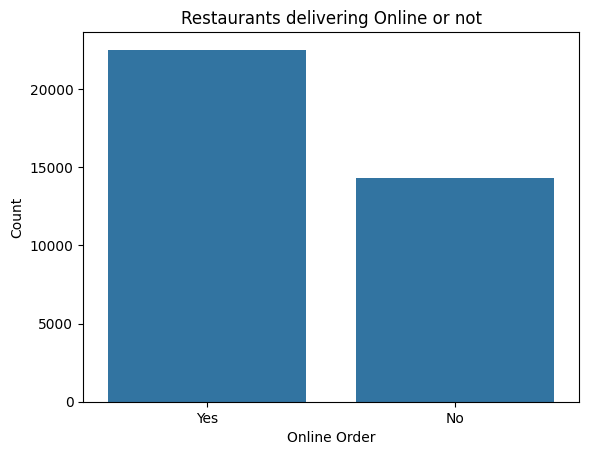

In [ ]:
sns.countplot(x="online_order", data=dataset)
plt.title("Restaurants delivering Online or not")
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.show()

### 2. Table Booking Distribution
Showing the count of restaurants that allow table booking versus those that don't.

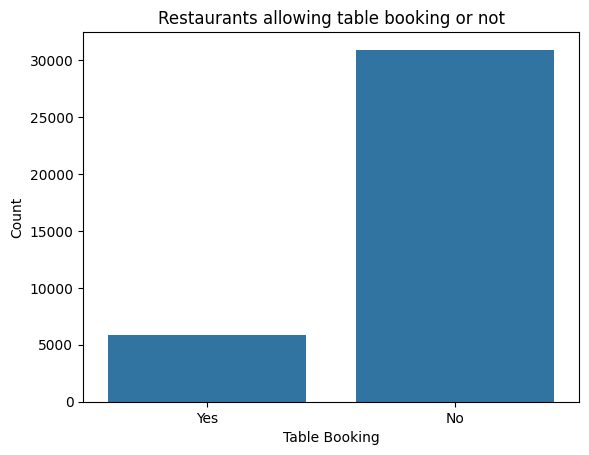

In [ ]:
sns.countplot(x="book_table", data = dataset)
plt.title("Restaurants allowing table booking or not")
plt.xlabel("Table Booking")
plt.ylabel("Count")
plt.show()

### 3. Location vs Rating Analysis
Analyzing the relationship between location, rating, and table booking availability using a boxplot.

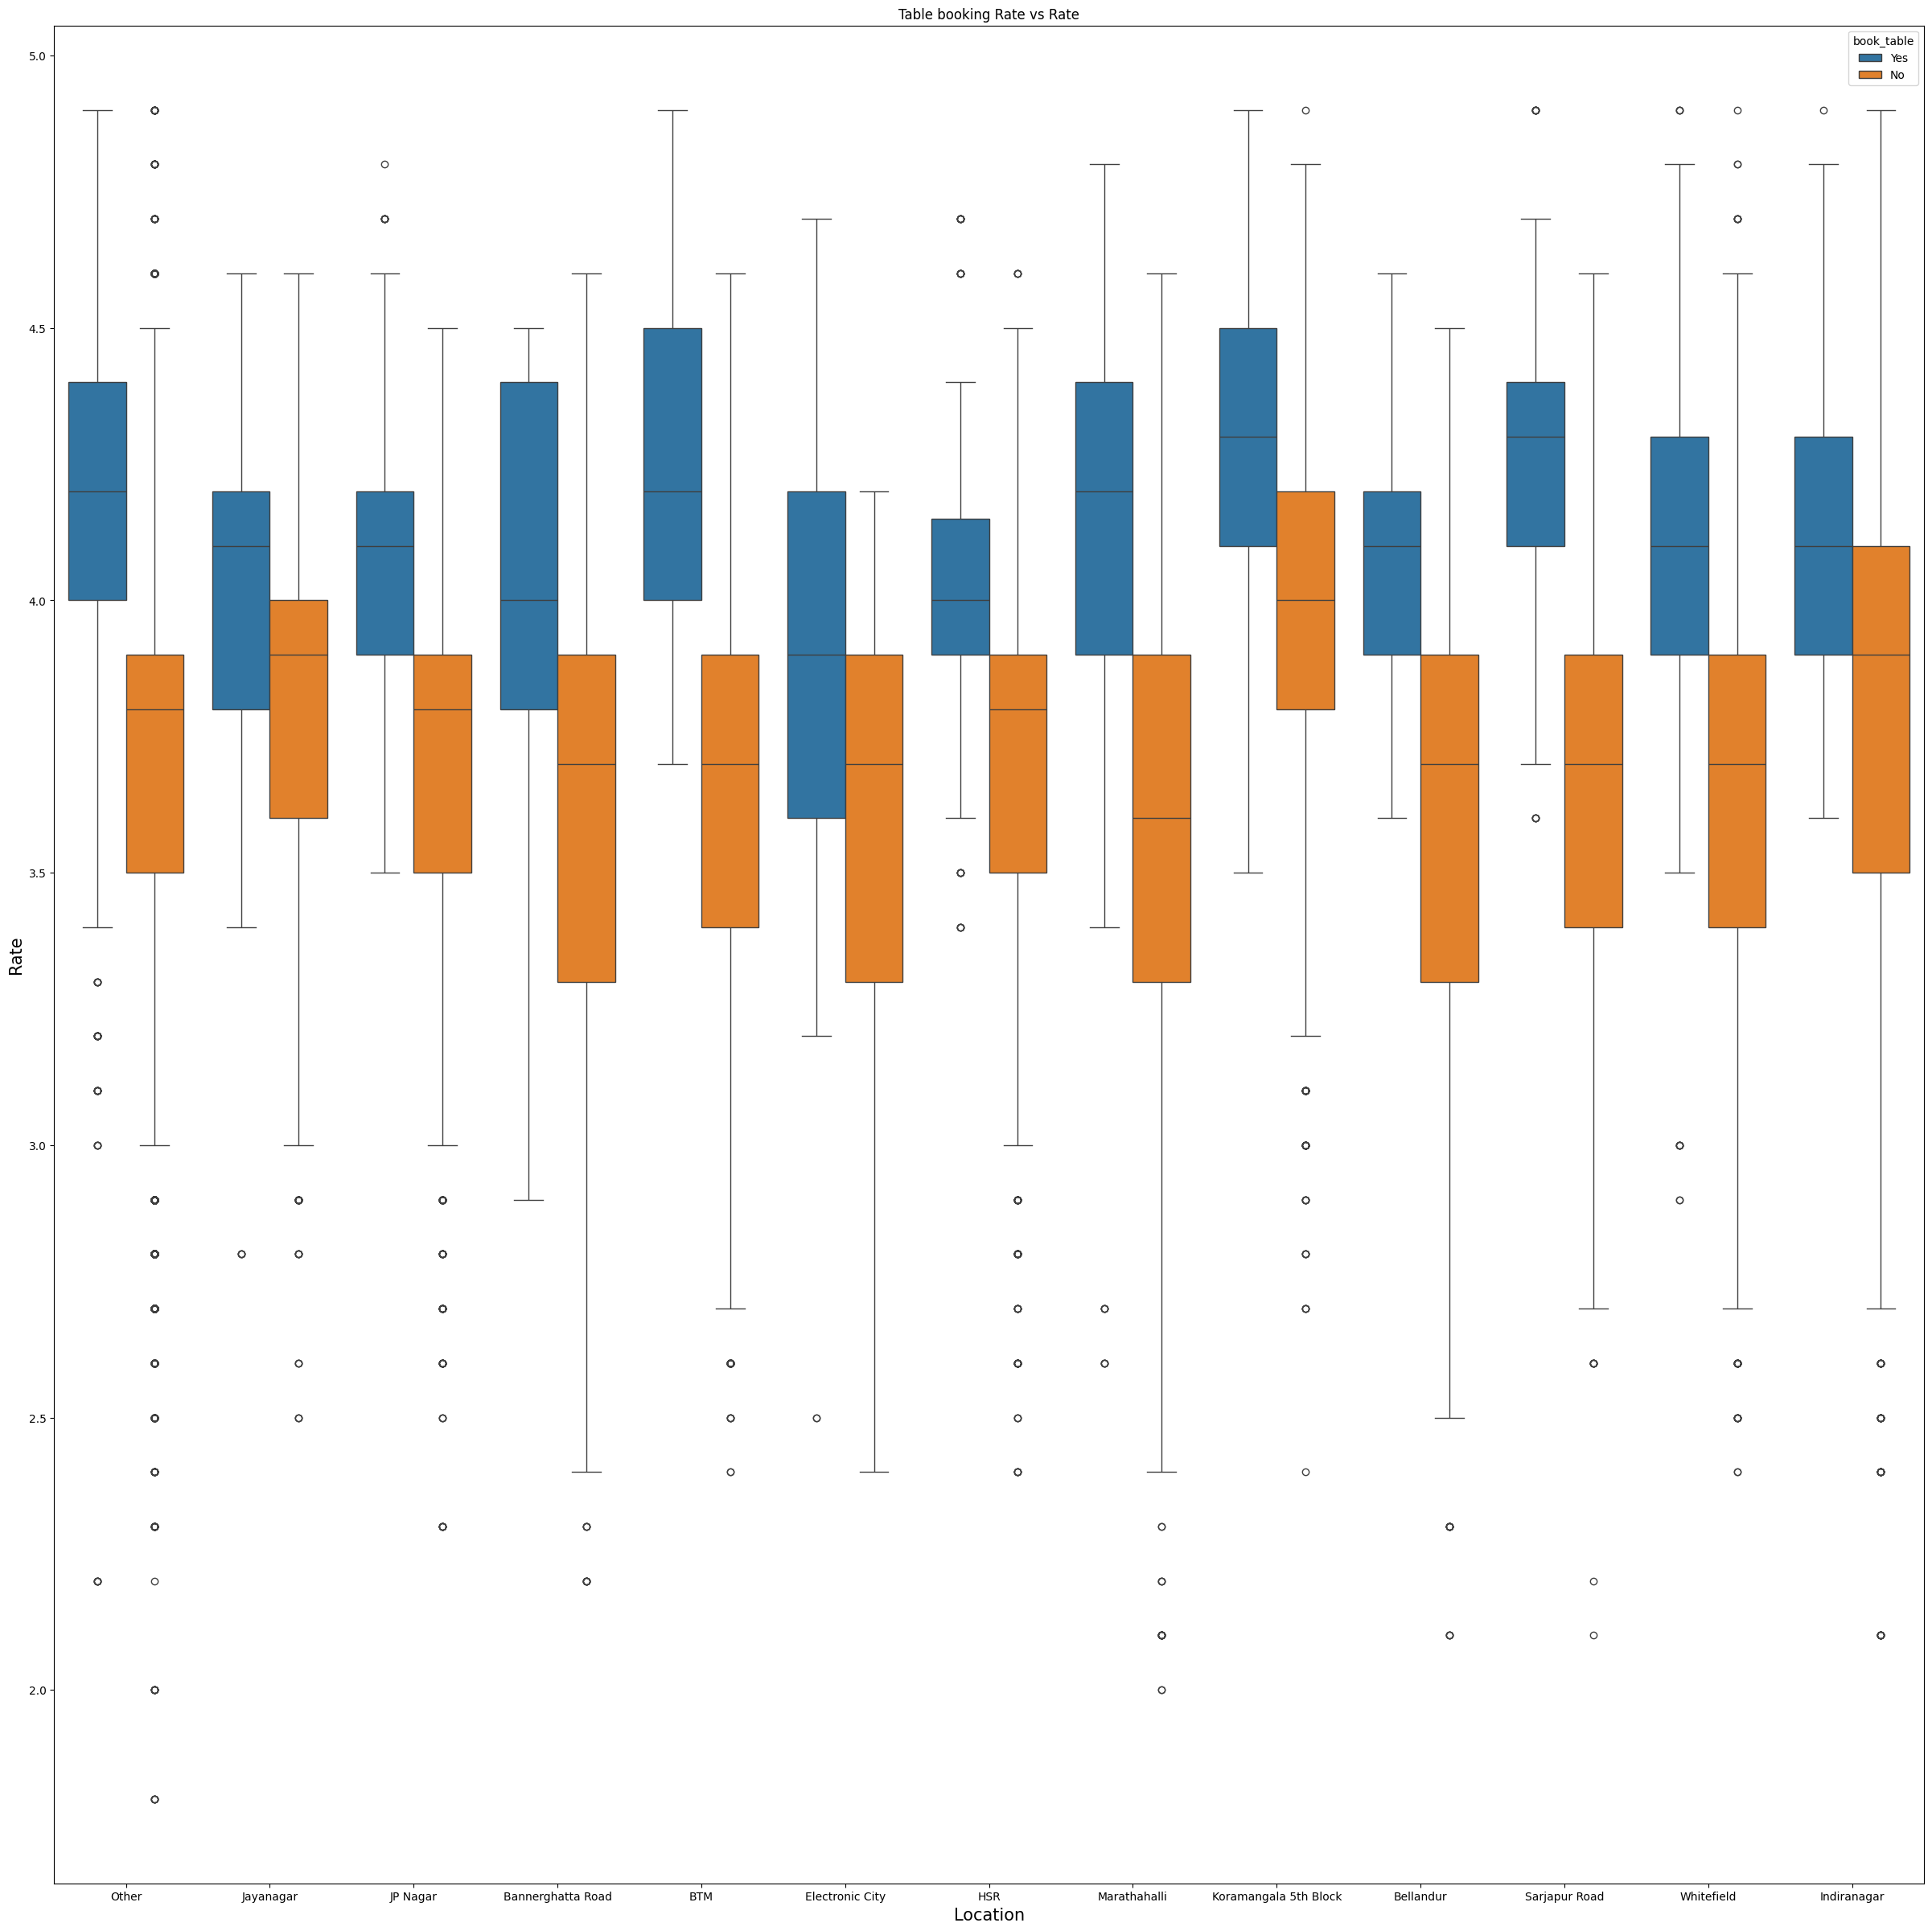

In [ ]:
plt.figure(figsize=(30, 30))
sns.boxplot(x='location', y='rate', hue='book_table', data=dataset)
plt.title("Table booking Rate vs Rate")
plt.xlabel("Location", fontsize=15)
plt.ylabel("Rate", fontsize=15)
plt.show()

### 4. Best Rated Locations
Displaying the top locations by average rating to identify the best areas for dining.

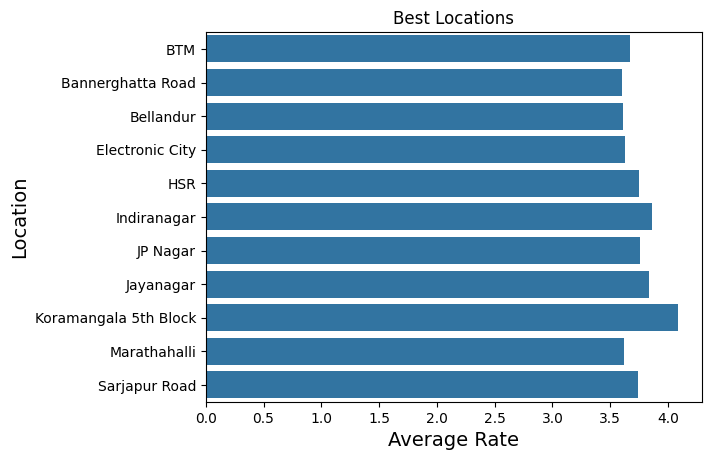

In [ ]:
best_locations = dataset.groupby('location')['rate'].mean().head(12).drop("Other")
sns.barplot(x=best_locations.values, y=best_locations.index)
plt.title("Best Locations")
plt.xlabel("Average Rate", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.show()

### 5. Location and Rating Relationship
Detailed analysis of how restaurant ratings vary across different locations.

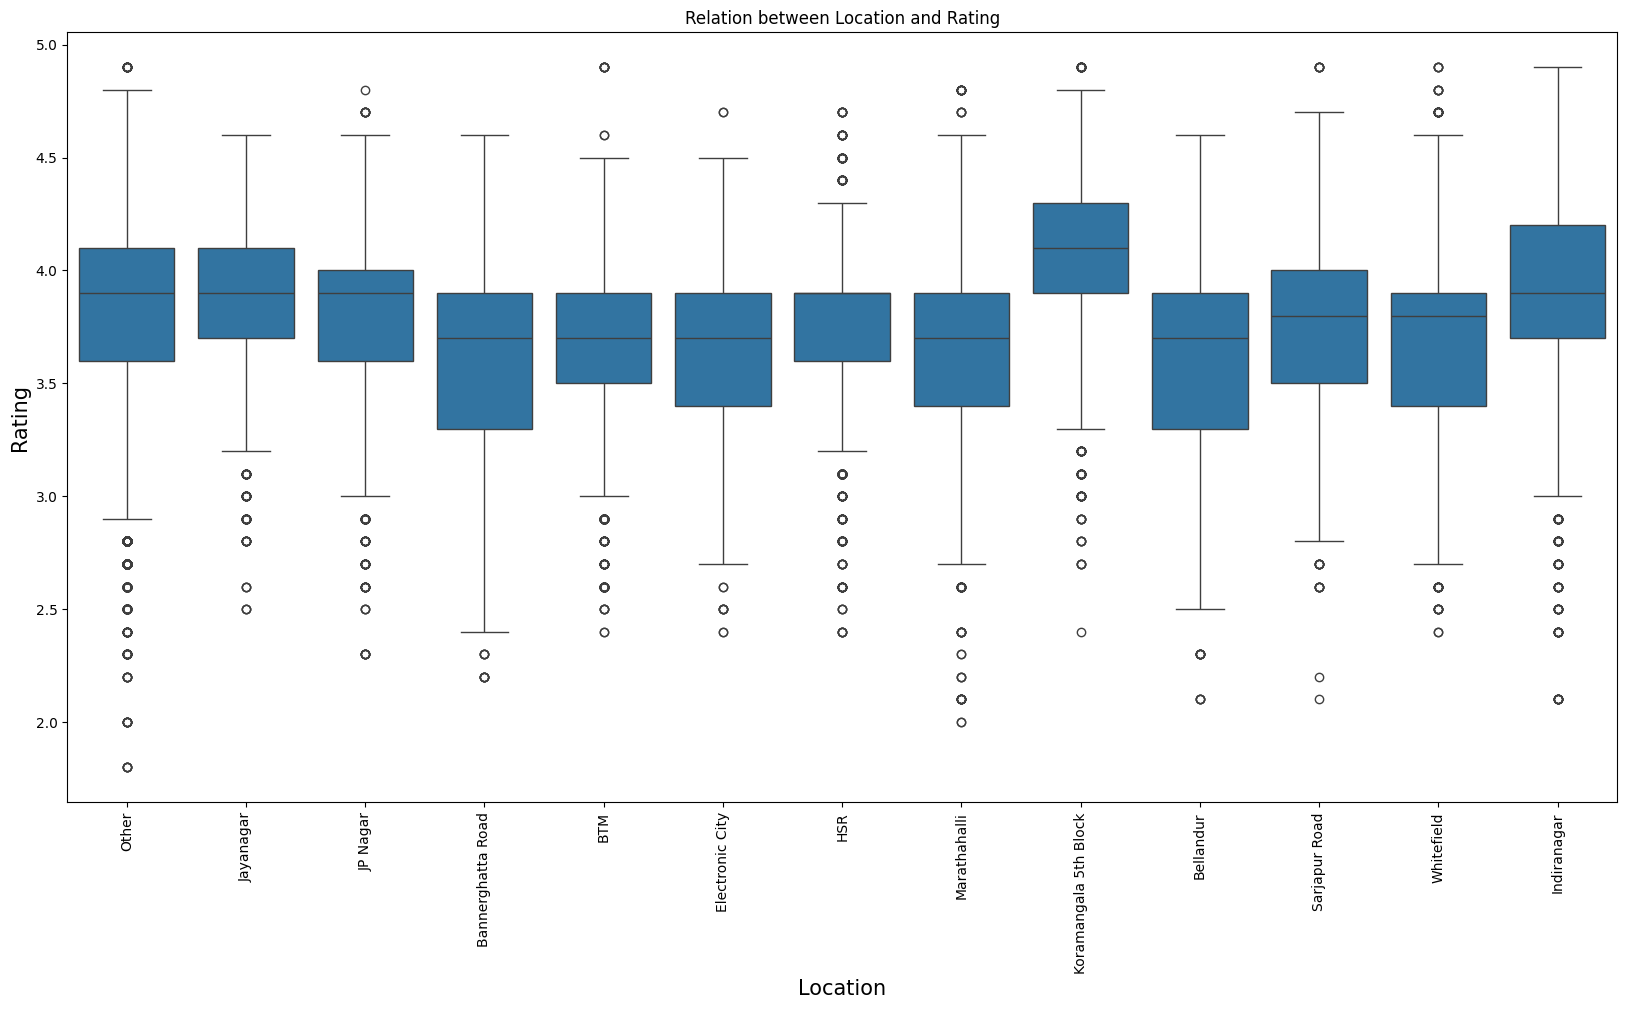

In [ ]:
loc_filter = dataset[dataset["location"].isin(top_location.index)]
plt.figure(figsize=(20, 10))
sns.boxplot(x="location", y="rate", data=dataset)
plt.title("Relation between Location and Rating")
plt.xticks(rotation=90)
plt.xlabel("Location", fontsize=15)
plt.ylabel("Rating", fontsize=15)
plt.show()

### 6. Restaurant Type Distribution
Visualizing the distribution of different types of restaurants in the dataset.

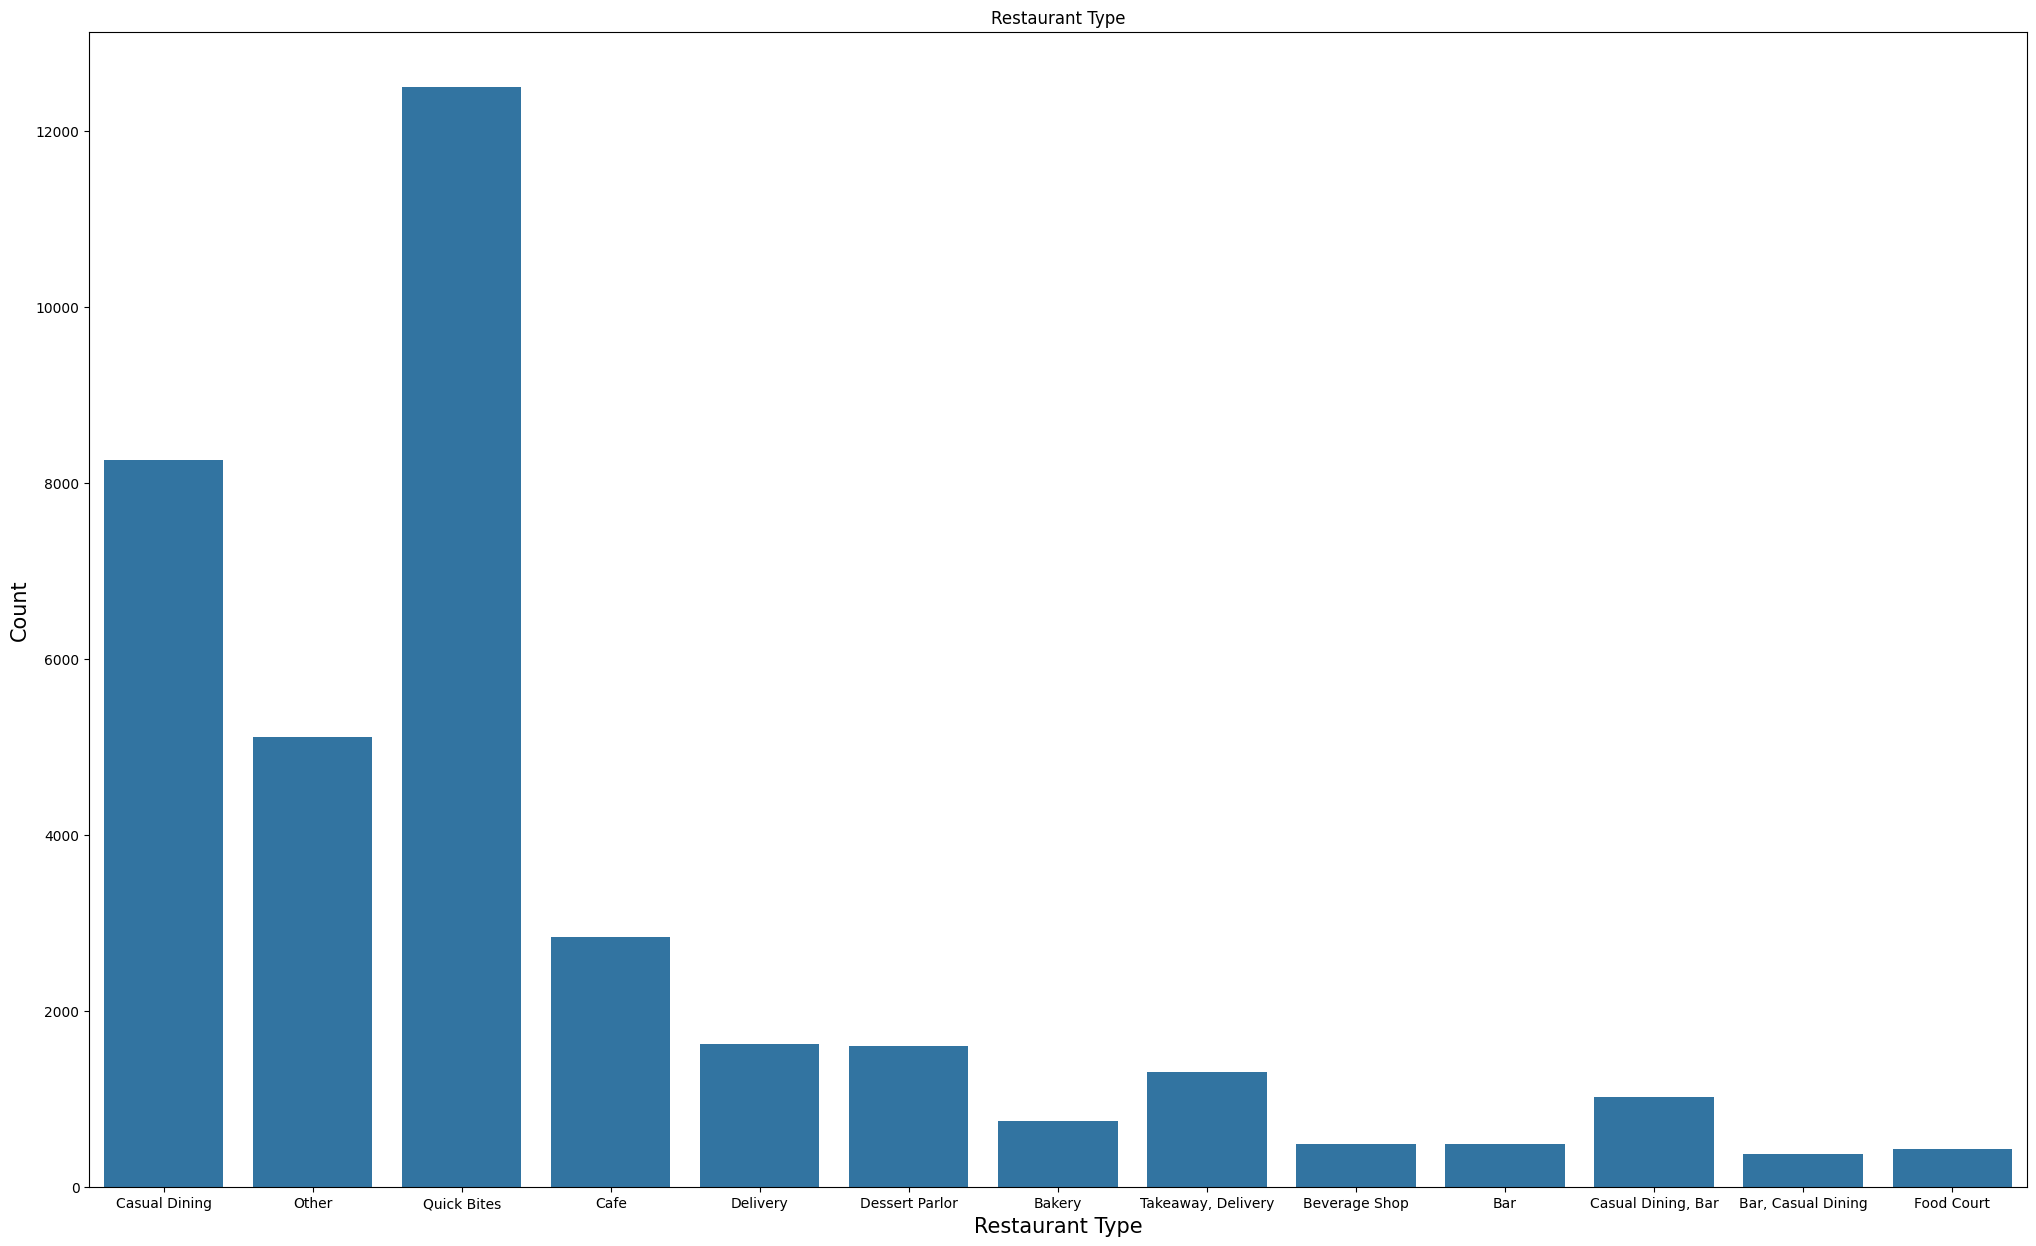

In [ ]:
plt.figure(figsize=(25, 15))
sns.countplot(x="rest_type", data = dataset)
plt.title("Restaurant Type")
plt.xlabel("Restaurant Type", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()


### 7. Rating Distribution Analysis
Showing the distribution of restaurant ratings with a histogram and KDE to understand rating patterns.

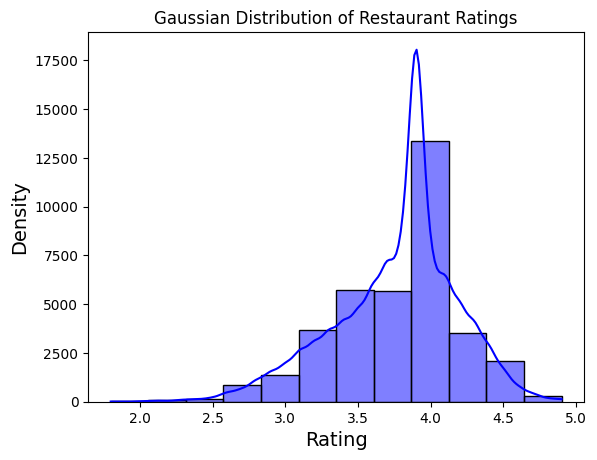

In [ ]:
sns.histplot(dataset['rate'], kde=True, bins=12, color='blue')
plt.title('Gaussian Distribution of Restaurant Ratings')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

### 8. Service Types Analysis
Analyzing the different types of services offered by restaurants (dining, delivery, etc.).

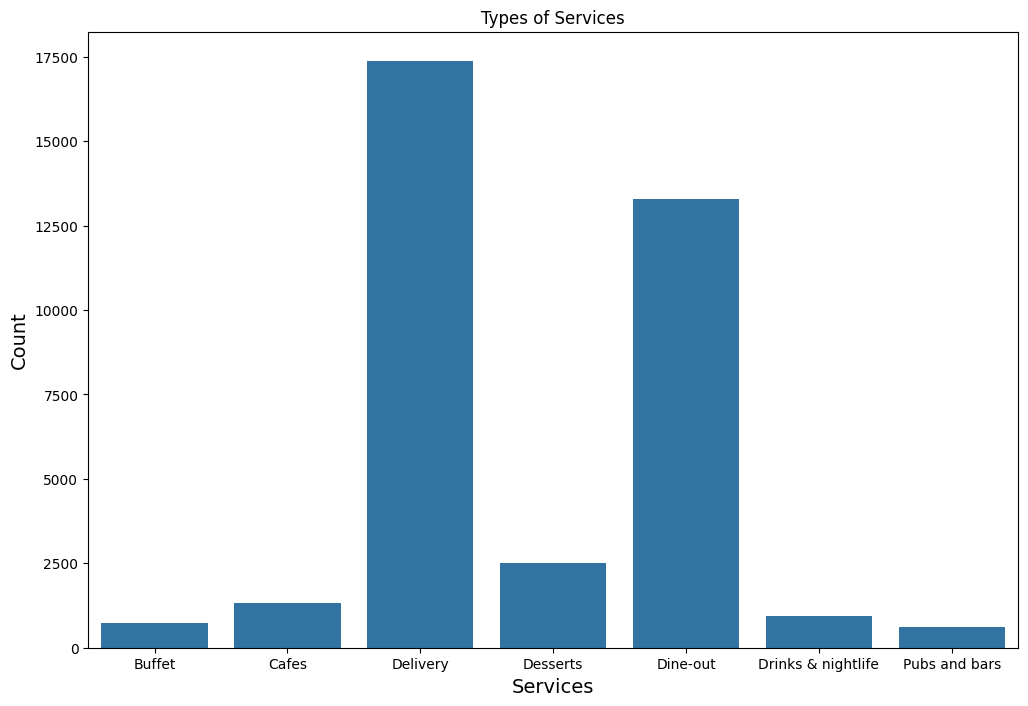

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x="type", data = dataset)
plt.title("Types of Services")
plt.xlabel("Services", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

### 9. Service Type vs Rating
Examining how different service types correlate with restaurant ratings.

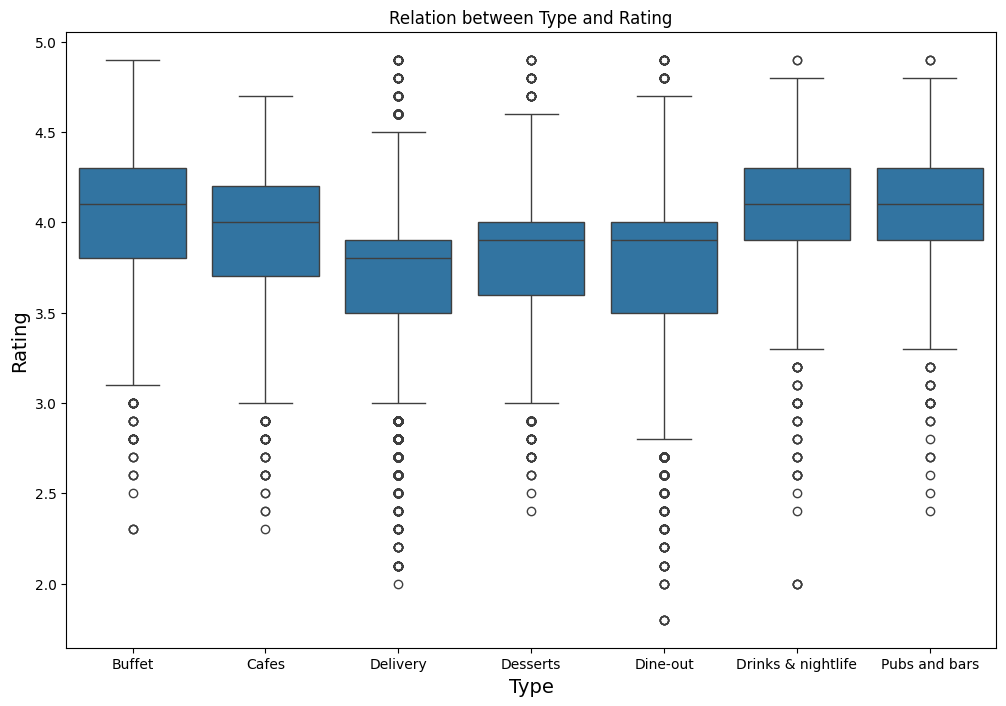

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="type", y = "rate", data = dataset)
plt.title("Relation between Type and Rating")
plt.xlabel("Type", fontsize=14)
plt.ylabel("Rating", fontsize=14)
plt.show()

### 10. Cost Distribution
Analyzing the distribution of cost for two people across all restaurants.

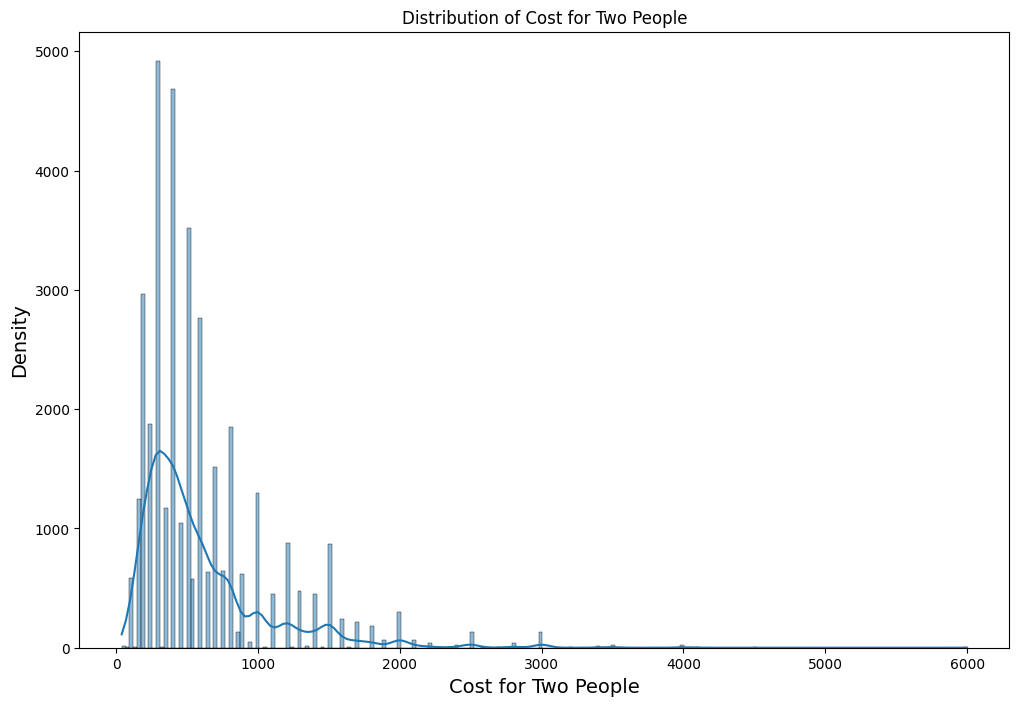

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(dataset["costFor2"], kde=True)
plt.title("Distribution of Cost for Two People")
plt.xlabel("Cost for Two People", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

### 11. Restaurant Count by Location
Showing the number of restaurants in the top 12 locations to understand market density.

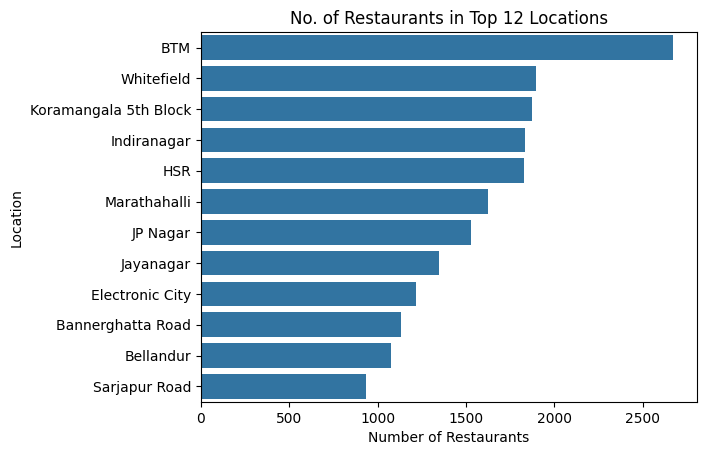

In [ ]:
sns.barplot(x=top_location.values, y=top_location.index)
plt.title("No. of Restaurants in Top 12 Locations")
plt.xlabel("Number of Restaurants")
plt.ylabel("Location")
plt.show()

## Regression Analysis Section
Beginning of predictive modeling using Linear Regression, Decision Tree Regressor and Random Forest Regressor for restaurant cost prediction.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36774 entries, 0 to 36773
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           36774 non-null  object 
 1   online_order   36774 non-null  object 
 2   book_table     36774 non-null  object 
 3   rate           36774 non-null  float64
 4   votes          36774 non-null  int64  
 5   location       36774 non-null  object 
 6   rest_type      36774 non-null  object 
 7   cuisines       36774 non-null  object 
 8   costFor2       36774 non-null  float64
 9   type           36774 non-null  object 
 10  reviews_count  36774 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


### Data Encoding & Correlation Analysis
Converting categorical variables to numeric and examining feature relationships.

In [ ]:
le = LabelEncoder()
# Encode categorical variables
dataset = dataset.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

# Display the correlation matrix
dataset.corr()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costFor2,type,reviews_count
name,1.000000,0.012273,0.010367,0.009303,0.005392,0.016197,0.003206,0.049157,0.028743,0.014042,0.003796
online_order,0.012273,1.000000,-0.019793,0.014835,0.013784,-0.065310,-0.008067,0.047217,-0.110790,-0.208573,-0.015048
book_table,0.010367,-0.019793,1.000000,0.404591,0.401172,0.080538,-0.220985,0.144485,0.631366,0.112594,0.266607
rate,0.009303,0.014835,0.404591,1.000000,0.412450,0.087590,-0.135159,0.080627,0.352627,0.032904,0.237040
votes,0.005392,0.013784,0.401172,0.412450,1.000000,0.056920,-0.115576,0.117818,0.388476,0.062028,0.436463
location,0.016197,-0.065310,0.080538,0.087590,0.056920,1.000000,-0.044720,0.003975,0.131621,0.050393,0.052470
rest_type,0.003206,-0.008067,-0.220985,-0.135159,-0.115576,-0.044720,1.000000,0.106799,-0.294173,0.024594,-0.099701
cuisines,0.049157,0.047217,0.144485,0.080627,0.117818,0.003975,0.106799,1.000000,0.142813,0.054507,0.083160
costFor2,0.028743,-0.110790,0.631366,0.352627,0.388476,0.131621,-0.294173,0.142813,1.000000,0.174957,0.272287
type,0.014042,-0.208573,0.112594,0.032904,0.062028,0.050393,0.024594,0.054507,0.174957,1.000000,0.051097


### Model Preparation
Feature selection, scaling, and polynomial feature creation for regression models.

In [ ]:
X = dataset.drop(columns = dataset.select_dtypes(include=['object']).columns)
X = X.drop(columns=["costFor2"])
y = dataset["costFor2"]

scaler = StandardScaler()
pf = PolynomialFeatures(degree=2)

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X = pf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 1. Linear Regression Model
Training and evaluating linear regression for cost prediction.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

score_lr = lr.score(X_test, y_test)
mean_squared_error_lr = mean_squared_error(y_test, lr.predict(X_test))
r2_score_lr = r2_score(y_test, lr.predict(X_test))

print(f"Linear Regression Score: {score_lr}")
print(f"Mean Squared Error: {mean_squared_error_lr}")
print(f"R2 Score: {r2_score_lr}")


Linear Regression Score: 0.5892168078657664
Mean Squared Error: 82127.1015373647
R2 Score: 0.5892168078657664


### 2. Decision Tree Regression
Non-linear model for comparison with linear regression.

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

score_dtr = dtr.score(X_test, y_test)
mean_squared_error_dtr = mean_squared_error(y_test, dtr.predict(X_test))
r2_score_dtr = r2_score(y_test, dtr.predict(X_test))

print(f"Decision Tree Regression Score: {score_dtr}")
print(f"Mean Squared Error (Decision Tree): {mean_squared_error_dtr}")
print(f"R2 Score (Decision Tree): {r2_score_dtr}")

Decision Tree Regression Score: 0.8658763714138336
Mean Squared Error (Decision Tree): 26815.081713120326
R2 Score (Decision Tree): 0.8658763714138336


### 3. Random Forest Regression
Ensemble model for improved prediction accuracy.

In [ ]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

score_rfr = rfr.score(X_test, y_test)
mean_squared_error_rfr = mean_squared_error(y_test, rfr.predict(X_test))
r2_score_rfr = r2_score(y_test, rfr.predict(X_test))

print(f"Random Forest Regression Score: {score_rfr}")
print(f"Mean Squared Error (Random Forest): {mean_squared_error_rfr}")
print(f"R2 Score (Random Forest): {r2_score_rfr}")

Random Forest Regression Score: 0.9261013740708082
Mean Squared Error (Random Forest): 14774.411590762558
R2 Score (Random Forest): 0.9261013740708082
